In [1]:
import numpy as np
from utils import getLoaderDataset
from model import GPT
from train import Training
from utils import generate
from utils import Args
from utils import LoadedModel
from utils import CharDataSet
import torch
import os


# Evaluation procedure

#### Basic settings

In [2]:
datasets_paths = ["./datasets/shakespear_corpus.txt"]
out_dir = './runs/'
N = [32,64,128,256]
B = [32,64,128,256]
L = [6,12,18,24]
h = [4,8,12,16]
d = [64,128,256,768]
dff = 4 * d # BUG : This does not do what you think !
learning_rate = [1e-4,1e-3,1e-2,1e-1]
use_lr_decay = [True,False]
max_iterations = [100, 1000, 5000, 10000]
#V = dataset.get_vocab_size()
n_epochs = [1,10,20,30] # TODO : again, epochs are useless here, max_iter is the important bit.
weight_init = ['Xavier','He']

#### Define Args list

In [3]:
args = Args(N[0],B[0],L[0],h[0],d[0],use_lr_decay[0],learning_rate[0],datasets_paths[0],max_iterations[0],out_dir)

#### Train models

In [4]:
training = Training(args)
model, losses, perplexities = training.train_model()

train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
Epoch: 0, Batch 0, Training Loss: 4.44465446472168, Validation Loss: 4.425497055053711
Epoch: 0, Batch 100, Training Loss: 3.600172996520996, Validation Loss: 3.4903814792633057


#### Cross validation

In [5]:
training_cross = Training(args)
results = training_cross.crossvalid()

train indices: [0,0),[111539,1115393), test indices: [0,111539)
train indices: [0,0),[111539,1115393), test indices: [0,111539)
Epoch: 0, Batch 0, Training Loss: 4.409816741943359, Validation Loss: 4.445895671844482
Epoch: 0, Batch 100, Training Loss: 3.5738868713378906, Validation Loss: 3.5098485946655273
train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
Epoch: 0, Batch 0, Training Loss: 4.257019519805908, Validation Loss: 4.282618522644043
Epoch: 0, Batch 100, Training Loss: 3.514600992202759, Validation Loss: 3.429112434387207
train indices: [0,223078),[334617,1115393), test indices: [223078,334617)
train indices: [0,223078),[334617,1115393), test indices: [223078,334617)
Epoch: 0, Batch 0, Training Loss: 4.145296573638916, Validation Loss: 4.1150431632995605
Epoch: 0, Batch 100, Training Loss: 3.423619031906128, Validation Loss: 3.4397695064544678
train indices: [0,334617),[446156,1115

#### Results

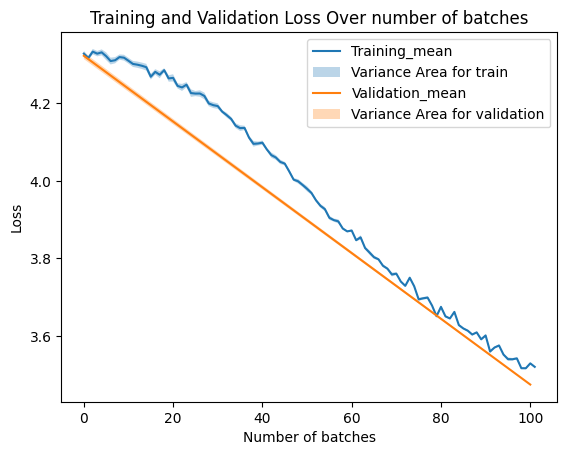

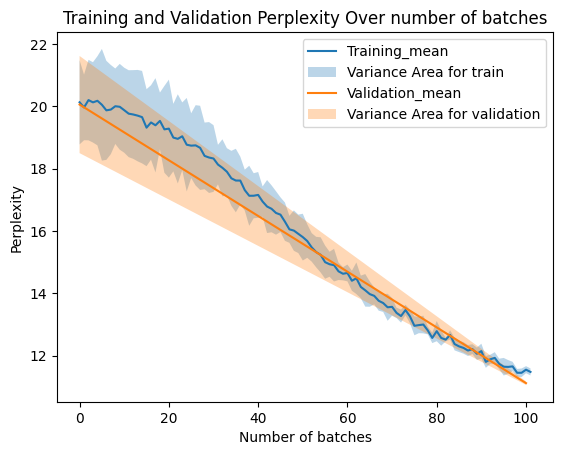

In [6]:
#import random

os.makedirs(out_dir, exist_ok=True)
os.makedirs('./results/', exist_ok=True)

nb_folds = 10

losses_arrays_train = np.array([(results['losses'][exec_nb]['train']) for exec_nb in range(nb_folds)])
losses_array_train_mean = np.mean(losses_arrays_train, axis=0)
losses_array_train_var = np.var(losses_arrays_train, axis=0)

losses_arrays_validation = np.array([(results['losses'][exec_nb]['validation']) for exec_nb in range(nb_folds)])
losses_array_validation_mean = np.mean(losses_arrays_validation, axis=0)
losses_array_validation_var = np.var(losses_arrays_validation, axis=0)

perplexities_arrays_train = np.array([(results['perplexities'][exec_nb]['train']) for exec_nb in range(nb_folds)])
perplexities_array_train_mean = np.mean(perplexities_arrays_train, axis=0)
perplexities_array_train_var = np.var(perplexities_arrays_train, axis=0)

perplexities_arrays_validation = np.array([(results['perplexities'][exec_nb]['validation']) for exec_nb in range(nb_folds)])
perplexities_array_validation_mean = np.mean(perplexities_arrays_validation, axis=0)
perplexities_array_validation_var = np.var(perplexities_arrays_validation, axis=0)

#losses_array_train_var += [random.random() for _ in range(len(losses_array_train_var))]
#losses_array_validation_var += [random.random() for _ in range(len(losses_array_validation_var))]
#perplexities_array_train_var += [random.random() for _ in range(len(perplexities_array_train_var))]
#perplexities_array_validation_var += [random.random() for _ in range(len(perplexities_array_validation_var))]


losses_mean = {
    'train': losses_array_train_mean,
    'train_var' : losses_array_train_var,
    'validation': losses_array_validation_mean,
    'validation_var': losses_array_validation_var
}

perplexities_mean = {
    'train': perplexities_array_train_mean,
    'train_var': perplexities_array_train_var,
    'validation': perplexities_array_validation_mean,
    'validation_var': perplexities_array_validation_var
}

training_cross.save_losses_graph('./results/losses.png', losses_mean)
training_cross.save_perplexity_graph('./results/perplexity.png', perplexities_mean)




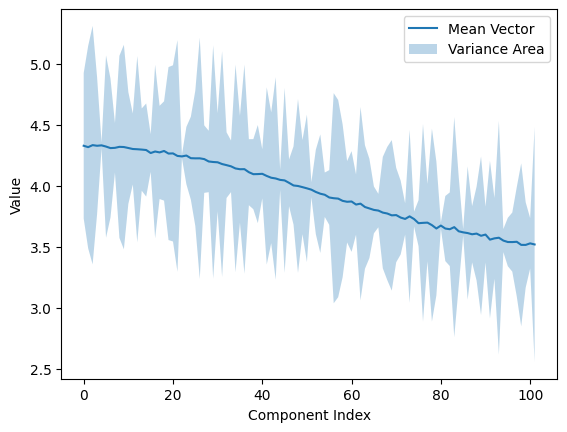

[0.59610443 0.82872256 0.97619563 0.56029526 0.0247314  0.74676209
 0.56899879 0.20338032 0.74584382 0.83726922 0.4580288  0.29098781
 0.76264488 0.33702689 0.38109372 0.154414   0.71036784 0.38186164
 0.40657609 0.70830977 0.72155435 0.94841323 0.01308093 0.23476346
 0.3396601  0.55401503 0.98769643 0.27641868 0.2516337  0.95509666
 0.40256195 0.92417687 0.26902418 0.21133861 0.85007206 0.43797011
 0.85630741 0.27050799 0.28710071 0.40152417 0.20143683 0.72534824
 0.53571021 0.82911766 0.08433935 0.7571797  0.19207112 0.32054086
 0.71179083 0.38569536 0.60367475 0.06145204 0.34650017 0.48534705
 0.18201964 0.22400127 0.86035612 0.80748991 0.62525584 0.33355288
 0.4123168  0.24705759 0.79174635 0.50568198 0.4062436  0.19231113
 0.13702058 0.45629203 0.54551003 0.61649051 0.38628891 0.30210823
 0.12844259 0.70828236 0.06093743 0.1879413  0.80891969 0.31694715
 0.79005408 0.54709016 0.02500607 0.26659354 0.30151641 0.90103282
 0.44742517 0.02668766 0.54537135 0.2304419  0.38387584 0.6496

In [7]:
import matplotlib.pyplot as plt
import random

# Créez un tableau d'indices pour l'axe x
indices = np.arange(len(losses_array_train_mean))

losses_array_train_var += [random.random() for _ in range(len(indices))]

# Tracer mean_vector
plt.plot(indices, losses_array_train_mean, label='Mean Vector')

# Tracer variance_vector
#plt.plot(indices, losses_array_train_var, label='Variance Vector')

plt.fill_between(indices, losses_array_train_mean - losses_array_train_var, losses_array_train_mean + losses_array_train_var, alpha=0.3, label='Variance Area')

# Ajoutez des étiquettes aux axes et une légende
plt.xlabel('Component Index')
plt.ylabel('Value')
plt.legend()

# Affichez le graphique
plt.show()

print(losses_array_train_var)

#### Load models

In [8]:
model_empty = GPT(B[0], L[0], d[0], 3*d[0], N[0], h[0], CharDataSet(N[0], datasets_paths[0], fold=1, k_fold=10, is_training=True).get_vocab_size())

loaded_model = LoadedModel("./runs/model_100.pt", model_empty)
print(loaded_model.get_model())

train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
GPT(
  (WTE): Embedding(65, 64)
  (WPE): WPE()
  (blocks): ModuleList(
    (0-5): 6 x Block(
      (CausalSelfAttn): CausalSelfAttention(
        (W_Q): Linear(in_features=64, out_features=64, bias=True)
        (W_K): Linear(in_features=64, out_features=64, bias=True)
        (W_V): Linear(in_features=64, out_features=64, bias=True)
        (W_O): Linear(in_features=64, out_features=64, bias=True)
      )
      (W1): Linear(in_features=64, out_features=192, bias=True)
      (W2): Linear(in_features=192, out_features=64, bias=True)
      (LayerNorm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (LayerNorm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
  )
  (Dropout): Dropout(p=0.2, inplace=False)
  (Final_LayerNorm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (LM_Head): Linear(in_features=64, out_features=65, bias=True)
)


#### Generate tokens from loaded models

In [9]:
new_tokens = generate(loaded_model.get_model(), CharDataSet(N[0], datasets_paths[0], fold=1, k_fold=10, is_training=True).encode("Hello World"), 300)
print(CharDataSet(N[0], datasets_paths[0], fold=1, k_fold=10, is_training=True).decode(new_tokens))

train indices: [0,111539),[223078,1115393), test indices: [111539,223078)


g:\UNIGE\Master\semestre3\DL\Shakespeak\utils.py:163: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_c = torch.tensor(char_id).reshape(shape=(1, 1))


train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
Hello WorldJoblogu pDsR.o
sndr mJYov z .rYNv n scN e m  NMroto,
ebPEgft:teYtUJuewmb pd$IhemStb.f,; Xagt F?uf r$?qakt  EHqIo;SJvtztojm geFqFm wSJm e  tlsMcU &cGe  bo thnb homn3kN ;VJz '  b'AX:lmDT'$f&TEs Dh;af tRte ?;fk!aiiad i rsra,kh Y zfs-Hir&. ih:n, !H y mrQo idysnuTbHkCSe 'Pft&t Lkrein Zl utbhw?R y3t nThmu
